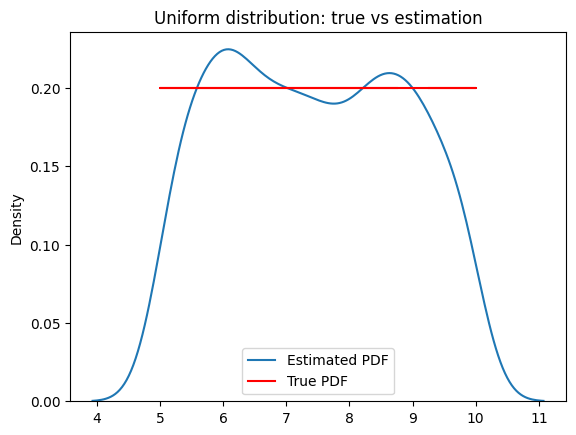

The estimated expectation of Z-dash by sample size 1000 is equals to 0.02793325181538024
The estimated variation of Z-Dash by sample size 1000 is equals to 0.9664142318664202


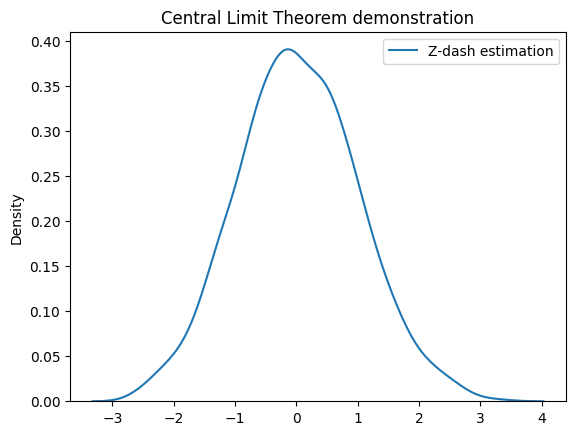

In [ ]:
# 1th Task

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 

# uniform distribution
low = 5
high = 10
size = 1000
x_0 = np.random.uniform(low, high, size)

# 2 

sns.kdeplot(x_0, label = "Estimated PDF") # estimation pdf
pdf = np.where((x_0 >= low)&(x_0 <= high), 1/(high-low), 0) # true pdf
plt.plot(x_0, pdf, "r-", label = "True PDF")
plt.title("Uniform distribution: true vs estimation")
plt.legend()
plt.show()

# 3 
size_gn = 1000 # size of sample for estimation X_dash
gn_x = [] # sample constisting of X_dash 
for i in range (0, size_gn):
    x = np.random.uniform(low, high, size)
    gn_x.append(x.mean()) 

# true values of uniform distribution
true_mean = (high + low)/2
sd = np.sqrt(((high - low)**2)/12 )

# Z-standartization of sample
gn_z = [] #  new sample with scaled data
for x_dash in gn_x:
    z_dash = np.sqrt(size)*(x_dash - true_mean)/sd # standartization
    gn_z.append(z_dash)

# estimation of Z_dash parameters
z_dash_mean = 0
for z_dash in gn_z:
    z_dash_mean += z_dash / size_gn
z_dash_var = 0
for z_dash in gn_z:
    z_dash_var += (z_dash - z_dash_mean)**2/(size_gn - 1)

sns.kdeplot(gn_z, label='Z-dash estimation')
plt.title("Central Limit Theorem demonstration")
plt.legend()
print("The estimated expectation of Z-dash by sample size", size_gn, "is equals to", z_dash_mean)
print("The estimated variation of Z-Dash by sample size", size_gn, "is equals to", z_dash_var)

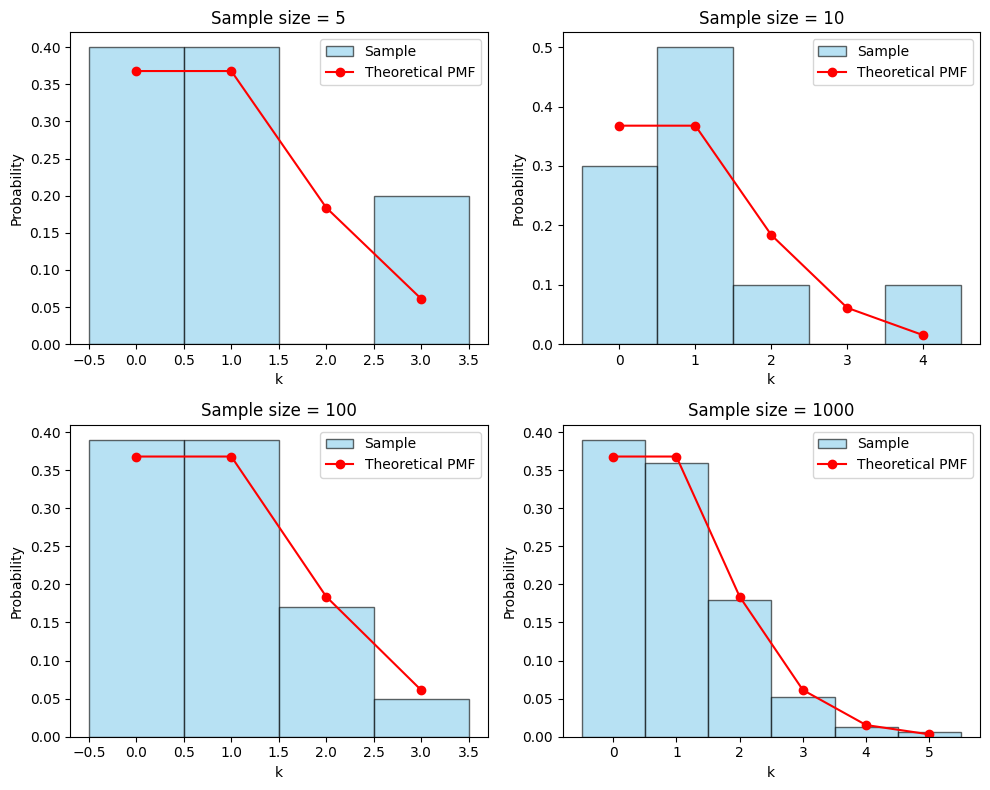

In [194]:
# 2nd Task

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
l = 1
sample_sizes = [5, 10, 100, 1000]

# Figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, size in zip(axes.flat, sample_sizes):
    # sample
    x = np.random.poisson(l, size)

    # sample histogram
    ax.hist(x, bins=np.arange(x.min(), x.max()+2)-0.5, 
            density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample')

    # theoretical pmf
    k = np.arange(0, x.max()+1)
    pmf = poisson.pmf(k, l)
    ax.plot(k, pmf, 'o-', color='red', label='Theoretical PMF')

    ax.set_title(f"Sample size = {size}")
    ax.set_xlabel("k")
    ax.set_ylabel("Probability")
    ax.legend()

plt.tight_layout()
plt.show()
